# Final Exam (part 3) - Computational Physics I

### Deadline: Friday 13 December 2024 (by 17h00)
### Credits: 10 points

### Please keep the structure provided below and submit an organised notebook with clear answers to each item.

## Name: Alan Palma Travez

## 3. Fourier analysis: removing Herringbone MRI artifacts

This problem consist of using Fourier analysis to remove undesired Herringbone artifacts from magnetic resonance images (MRI).

The file provided below **herringbone-mri-artifact.jpg** contains a brain MRI image affected by the Herringbone artifact. This artifact can be produced by electromagnetic spikes by gradient coils, a fluctuating power supply, or radiofrequency pulse discrepancies during MRI scanning. In real space, the regularly spaced stripes resemble the appearance of a fabric with a herringbone pattern (which gives the artifact its name). In this image, the artifact covers the entire image with multiple diagonal stripes, which would be seen as spike artifacts in Fourier space. Your task is to remove them.

#### Download the image file:
https://github.com/wbandabarragan/physics-teaching-data/blob/main/2D-data/herringbone-mri-artifact.jpg

#### Reference:
Case courtesy of Frank Gaillard, <a href="https://radiopaedia.org/?lang=us">Radiopaedia.org</a>. From the case <a href="https://radiopaedia.org/cases/19695?lang=us">rID: 19695</a>

# Solution

#### Image I/O:

(a) Inspect the file. Then, write a python function that reads the data from the **herringbone-mri-artifact.jpg** file, and returns its 3 layers (channels) as numpy arrays.

In [1]:
# Third party libraries

import numpy as np 
import matplotlib.pyplot as plt
import scienceplots
from PIL import Image, ImageDraw

In [2]:
plt.style.use(['science', 'notebook', 'no-latex']) #define the plot style

In [3]:
#Inspect the data 

# Define in path the directory of the image 

path = "2d_data/"
filename = "herringbone-mri-artifact.jpg"

img = plt.imread(path + filename)

# print(img.shape)
# print(type(img))

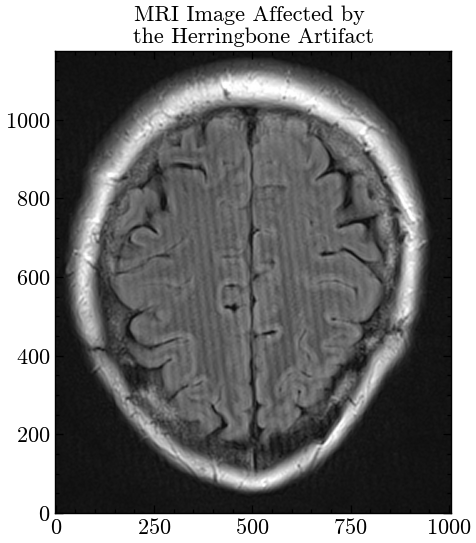

In [4]:
# First vizualization of image

plt.figure()

plt.imshow(img, origin='lower')
plt.title("MRI Image Affected by \nthe Herringbone Artifact")

plt.show()

In [5]:
# Create the function desaired

def read_img(path):
    """
    Function to read an three channel image and splits its chanels into arrays (RGB). 
    Input: 
        path(str): The file path to the image.
    Output: 
        imageR(int): 2D array representing the Red channel of the image.
        imageG(int): 2D array representing the Green channel of the image.
        imageB(int): 2D array representing the Blue channel of the image.
    Author: Alan Palma
    """
    # Read the image
    img = plt.imread(path)

    # Split the chanels of the image

    imageR = img[:, :, 0]
    imageG = img[:, :, 1]
    imageB = img[:, :, 2]

    return imageR, imageG, imageB
    


(b) Call your function, select a single channel and make a map of it. Identify and label the Herringbone artifacts on the image using small arrows.

In [6]:
# Call the function to read the image

imgR, imgG, imgB = read_img(path + filename)

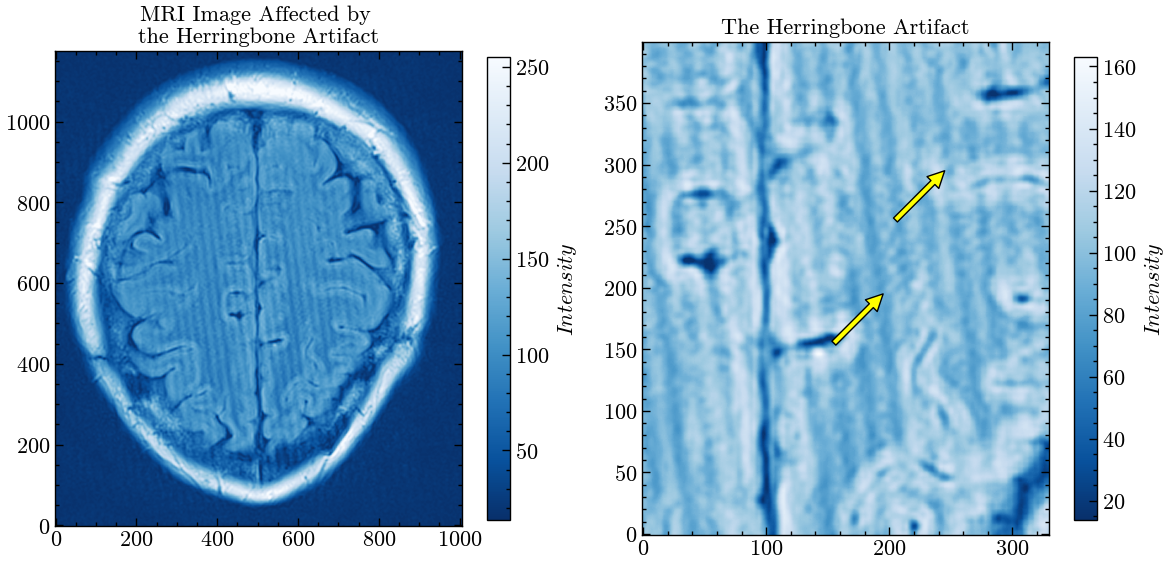

In [7]:
# Figure identifying the Herringbone artifact

fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (12,6))
ax1, ax2 = ax.flatten()

img1 = ax1.imshow(imgB, cmap = "Blues_r", origin='lower')

plt.colorbar(img1, shrink = 0.83, label = f"$Intensity$")
ax1.set_title("MRI Image Affected by \nthe Herringbone Artifact")

img2 = ax2.imshow(imgB[300:700, 400:730], cmap = "Blues_r", origin='lower')

ax2.annotate('', xy=(250, 300), xytext=(200, 250), arrowprops=dict(facecolor='yellow', shrink=0.1)) # Arrow 1
ax2.annotate('', xy=(200, 200), xytext=(150, 150), arrowprops=dict(facecolor='yellow', shrink=0.1)) # Arrow 2

ax2.set_title("The Herringbone Artifact")
plt.colorbar(img2, shrink = 0.83, label = f"$Intensity$")

plt.tight_layout()

plt.show()

#### 2D Fourier transform:

(c) Create a function that Fourier transforms this image and returns the Fourier image and the correct frequencies.

In [8]:
def Fourier_img(image):
    """
    Fuction to read a 2D image and computes a 2D fast Fourier transform,
    and shifts the low frequencies to the center.
    Inputs: 
        image(int): 2D array representing the input image
    Outputs: 
        shifted_fourier(float): 2D array of the Fourier-transformed image with low-frequency 
                                 components shifted to the center.
        freqs_X(float): 2D mesh grid of frequency components along the x-axis.    
        freqs_Y(float): 2D mesh grid of frequency components along the y-axis. 
    Author: Alan Palma
    """
    # Fourier transform to the image

    fourier_img = np.fft.fft2(image)

    # Shift the signal so that the low frequencies are at the centre

    shifted_fourier = np.fft.fftshift(fourier_img)

    # Get meshgrid of frequencies

    # Frequencies:
    freqs_x = np.fft.fftfreq(fourier_img.shape[1], d = 1)
    freqs_y = np.fft.fftfreq(fourier_img.shape[0], d = 1)

    # Frequency mesh:
    freqs_X, freqs_Y = np.meshgrid(sorted(freqs_x), sorted(freqs_y))

    return shifted_fourier, freqs_X, freqs_Y



(d) Call your function in (c), and make a two-panel figure with the original image on the left and a labeled 2D plot of its Fourier image on the right. Identify and label the Herringbone artifacts on the Fourier image.

In [9]:
# Call the fuction and get Fourier transform

imgB_F, freqB_X, freqB_Y = Fourier_img(imgB)

# Compute the norm 

imgB_F_norm = np.abs(imgB_F)

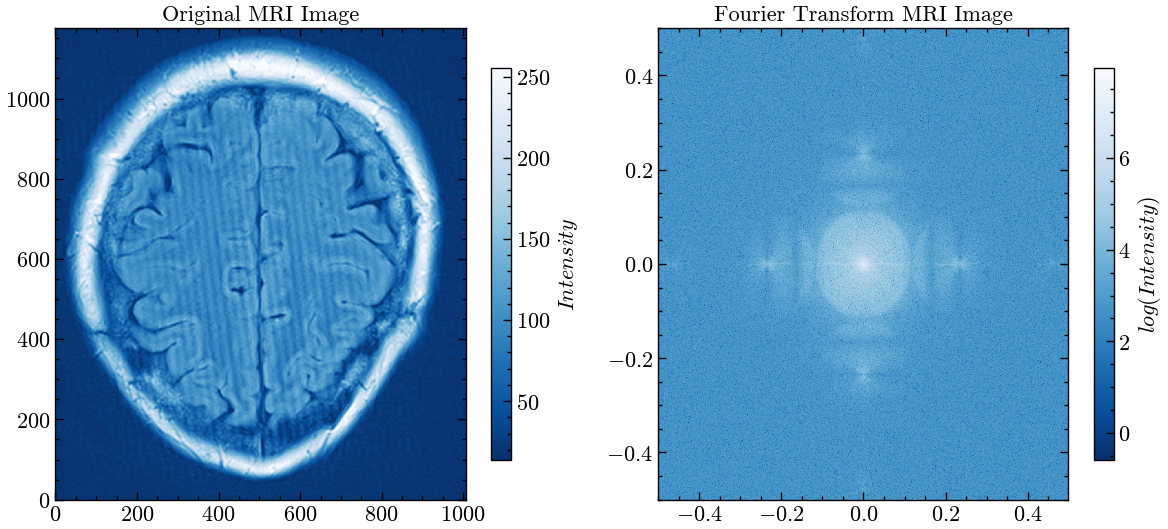

In [10]:
# Figure comparing the original image with its Fourier transform

fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (12,5.5))
ax1, ax2 = ax.flatten()

img1 = ax1.pcolormesh(imgB, cmap = "Blues_r")

ax1.set_title("Original MRI Image")
plt.colorbar(img1, shrink = 0.83, label = f"$Intensity$")

img2 = ax2.pcolormesh(freqB_X, freqB_Y, np.log10(imgB_F_norm), cmap = "Blues_r")

ax2.set_title("Fourier Transform MRI Image")
plt.colorbar(img2, shrink = 0.83, label = f"$log(Intensity)$")

plt.tight_layout()

plt.show()

(e) Briefly comment, how do the image artifacts look in Fourier space? 

The image artifacts should appear as two horizontal points around the middle of the image since the interference partern is almost vertical. These points can be easily seen by zooming into the middle of the image as follows:

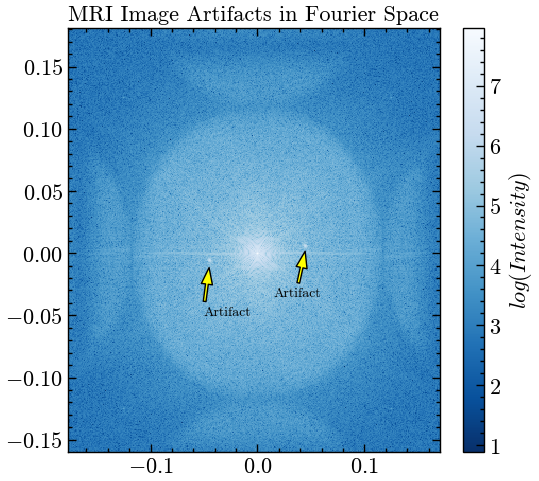

In [11]:
# Plot image zooming in the artifacts found

plt.figure(figsize = (6,5.5))

plt.pcolormesh(freqB_X[400:800, 325:675], freqB_Y[400:800, 325:675], np.log10(imgB_F_norm)[400:800, 325:675], cmap = "Blues_r")

plt.annotate(
    "Artifact", xy=(-0.045, -0.01), xytext=(-0.05, -0.05), arrowprops=dict(facecolor='yellow', 
                    shrink=0.05, width=2, headwidth=8), fontsize=10, color='black')
plt.annotate(
    "Artifact", xy=(0.045, 0.003), xytext=(0.015, -0.035), arrowprops=dict(facecolor='yellow', 
                    shrink=0.05, width=2, headwidth=8), fontsize=10, color='black')

plt.title("MRI Image Artifacts in Fourier Space")
plt.colorbar(label = f"$log(Intensity)$")

plt.show()

#### Masking and filtering:

(f) Create an appropriate mask for the Fourier image that matches the features associated with the Herringbone artifacts. Plot the mask.

**First step:** Create a high-pass filter to isolate high frequencies, including the artifacts.

In [12]:
# Isolate the "nucleous" of the image by a high pass filter

filtered = np.where(np.log10(imgB_F_norm) > 5.6, 1, 0.) # This is a binary image


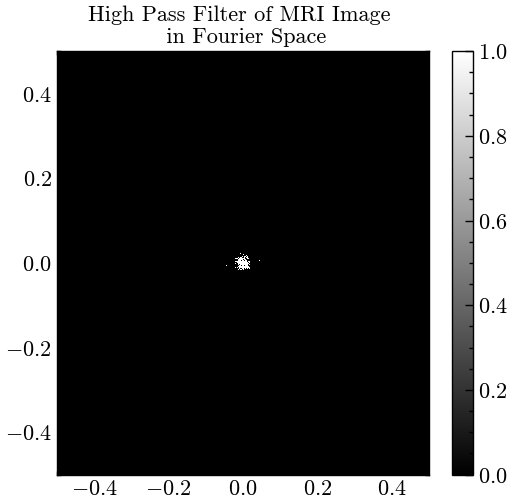

In [13]:
# Plot the high-pass filteres image (binary)

plt.figure(figsize = (6,5.5))

plt.pcolormesh(freqB_X, freqB_Y, filtered, cmap = "gray")
plt.title("High Pass Filter of MRI Image \n in Fourier Space")

plt.colorbar()

plt.show()

**Second Step:** Since the points are almost isolated, it is necessary to create a mask to avoid the center and preserve the information in the image.

In [14]:
# Get the center of image

image_centre = [imgB_F.shape[1]//2, imgB_F.shape[0]//2]

# Define a radious to eliminate the centre of the mask

rad = 30 #pixels

# Create a circular mask 

mask_1 = Image.new(mode = "RGB", size = (imgB_F.shape[1], imgB_F.shape[0]))

# Draw a circle in the middle of the mask

draw = ImageDraw.Draw(mask_1)

draw.ellipse((image_centre[0]-rad, image_centre[1]-rad, image_centre[0]+rad, image_centre[1]+rad), fill=(255, 0, 0), outline=(0, 0, 0))

In [15]:
# Convert to a binary image

mask_1_bin = (np.array(mask_1)[:,:,0]/255) 

# Invert the mask 

mask_1_bin = - mask_1_bin + 1

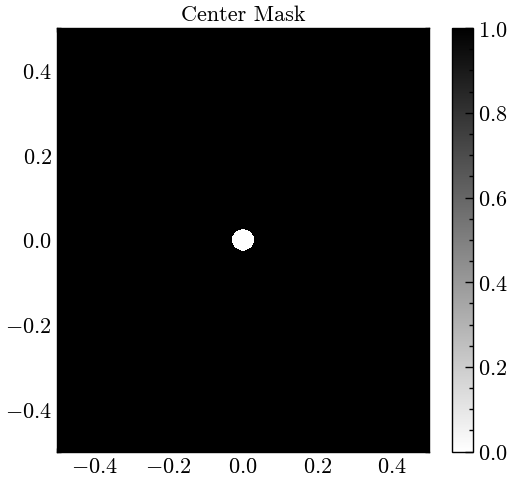

In [16]:
# Plot the mask 1 made to not lose center image information

plt.figure(figsize = (6,5.5))

plt.pcolormesh(freqB_X, freqB_Y, mask_1_bin, cmap = "gray_r")
plt.title(f"Center Mask")

plt.colorbar()

plt.show()

**Final Step:** Multiply the mask created with the high-pass filter binary image to isolate artifacts and create a final mask.

In [17]:
# Apply this mask to the high pass filter image

mask_final = - (filtered * mask_1_bin) + 1

# The mask should not be exactly zero at artifacts points to not lose information

mask_final = mask_final + 1.e-5

# Maintain the cells that have 1 to not affect the image

mask_final = np.where(mask_final > 1., 1., mask_final)

# print(np.unique(mask_final))

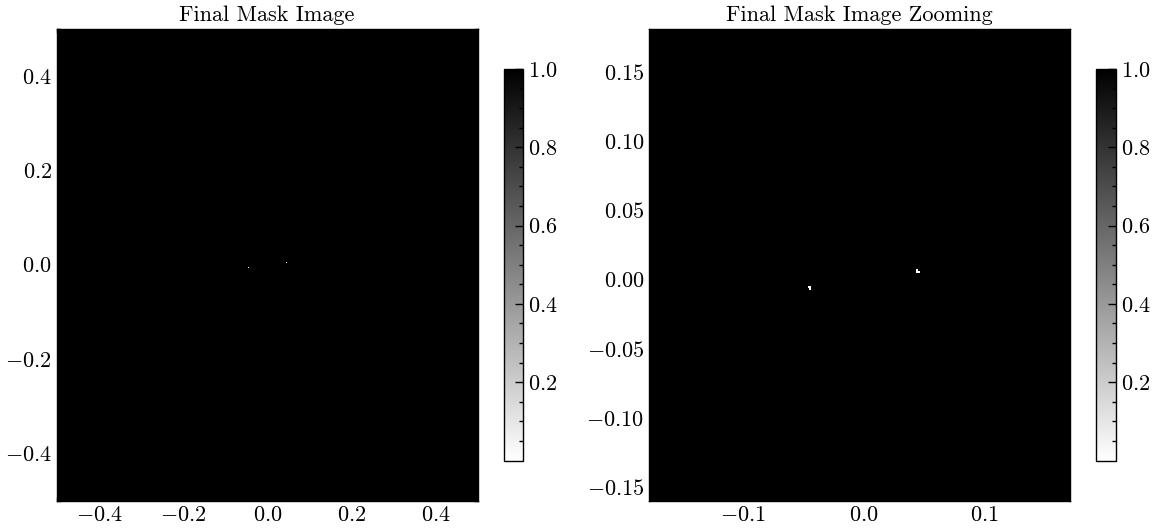

In [18]:
# Plot the final mask obtained

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5.5))
ax1, ax2 = ax.flatten()

img1 = ax1.pcolormesh(freqB_X, freqB_Y, mask_final, cmap = "gray_r")
ax1.set_title("Final Mask Image")

plt.colorbar(img1, shrink = 0.83)

img2 = ax2.pcolormesh(freqB_X[400:800, 325:675], freqB_Y[400:800, 325:675], mask_final[400:800, 325:675], cmap = "gray_r")
ax2.set_title("Final Mask Image Zooming")

plt.colorbar(img2, shrink = 0.83)

plt.tight_layout()

plt.show()

(g) Use your mask from (f) to remove the Herringbone artifacts from the Fourier image.

In [19]:
# Apply the final mask created to the original image in Fourier space

imgB_F_clean = imgB_F * mask_final

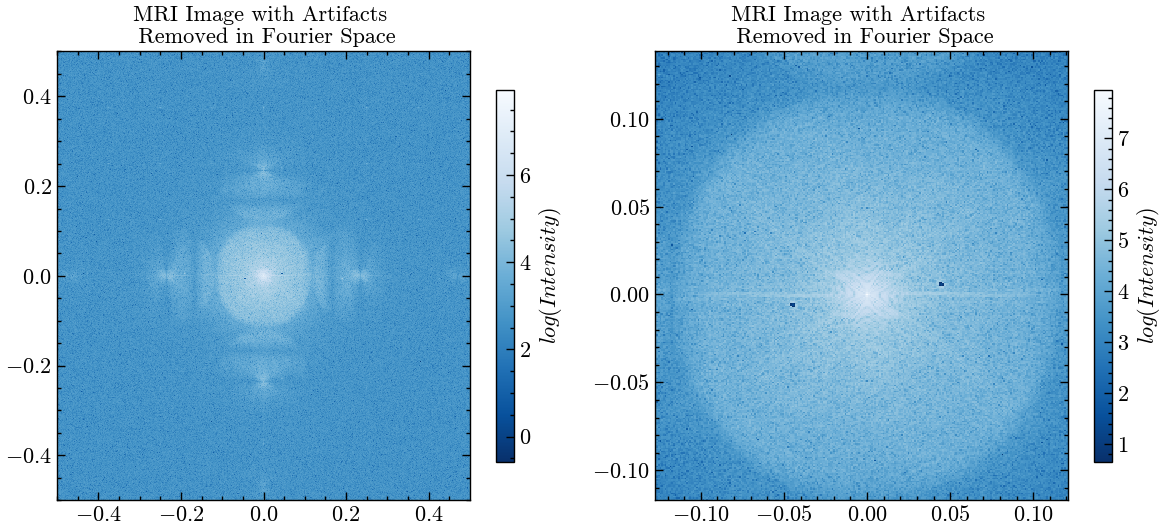

In [20]:
# Plot the final mask obtained

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5.5))
ax1, ax2 = ax.flatten()

img1 = ax1.pcolormesh(freqB_X, freqB_Y, np.log10(np.abs(imgB_F_clean)), cmap = "Blues_r")
ax1.set_title("MRI Image with Artifacts \n Removed in Fourier Space")

plt.colorbar(img1, shrink = 0.83, label = f"$log(Intensity)$")

img2 = ax2.pcolormesh(freqB_X[450:750, 375:625], freqB_Y[450:750, 375:625], np.log10(np.abs(imgB_F_clean))[450:750, 375:625], cmap = "Blues_r")
ax2.set_title("MRI Image with Artifacts \n Removed in Fourier Space")

plt.colorbar(img2, shrink = 0.83, label = f"$log(Intensity)$")

plt.tight_layout()

plt.show()

(h) Inverse Fourier transform the masked Fourier image and make a two-panel figure showing the original image on the left and the new filtered image (without the Herringbone artifacts) on the right.

In [21]:
# Unshift the image

imgB_F_clean_shifted = np.fft.ifftshift(imgB_F_clean)

# Compute inverse FFT

imgB_clean = np.fft.ifft2(imgB_F_clean_shifted)

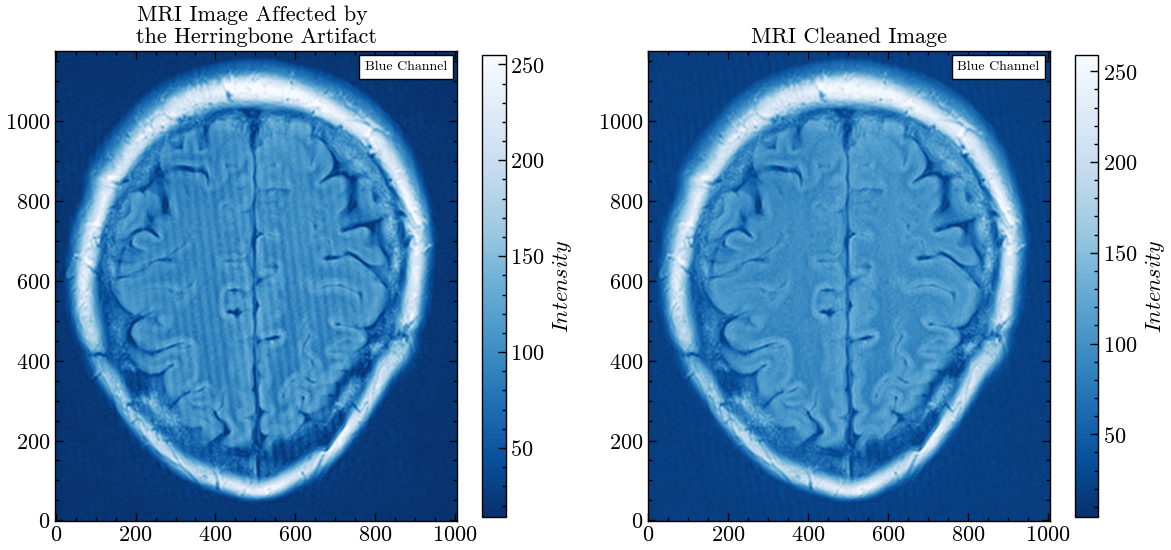

In [22]:
# Figure comparison between the original image and the cleaned image (Channel: Blue)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,6))
ax1, ax2 = ax.flatten()

img1 = ax1.imshow(imgB, origin = 'lower', cmap = "Blues_r")
ax1.text(980, 1150, "Blue Channel", ha = 'right', va = 'top', fontsize = 10,
            bbox = dict(facecolor = 'white', alpha = 1.0))

ax1.set_title("MRI Image Affected by \nthe Herringbone Artifact")
plt.colorbar(img1, shrink = 0.83, label = f"$Intensity$")

img2 = ax2.imshow(imgB_clean.real, origin = 'lower', cmap = "Blues_r")
ax2.text(980, 1150, "Blue Channel", ha ='right', va ='top', fontsize = 10,
            bbox = dict(facecolor='white', alpha = 1.0))

ax2.set_title("MRI Cleaned Image")
plt.colorbar(img2, shrink = 0.83, label = f"$Intensity$")

plt.tight_layout()

plt.show()

#### Artifact-free image:

(i) Create a function that combines all the previous steps. The function should receive an input image channel, apply the Fourier filter to it and return the original and the filtered channel images. Call and apply your filter function to the other two channels of the **herringbone-mri-artifact.jpg** image.

In [23]:
def clean_img(img_chanel, mask):
    """
    Function to clean channel image afected by Herringbone artifact using FFT and filter mask.
    Inputs: 
        img_chanel(int): 2D array representing the image channel (Red, Green, or Blue).
        mask(int): 2D binary array representing the frequency  mask used to filter the frequencies associated with the artifact.
    Output: 
        img_clean(float): 2D array of the cleaned image channel.
    Author: Alan Palma  
    """

    # Perform FFT 

    img_chanel_F,_, _ = Fourier_img(img_chanel)

    # Apply the mask to clean the image 

    img_chanel_F_clean = img_chanel_F * mask

    # Unshift the image

    img_chanel_clean_shifted = np.fft.ifftshift(img_chanel_F_clean)

    # Compute inverse FFT

    img_clean = np.fft.ifft2(img_chanel_clean_shifted)

    return img_clean

In [24]:
# Call the fuction for the last two channels of the image 

imgR_clean = clean_img(imgR, mask_final) # Clean the red chanel (First)
imgG_clean = clean_img(imgG, mask_final) # Clean the green chanel (Second)


(j) Using the output clean images from (i), reconstruct the 3-layered image and make a two panel figure showing the original 3-layered image and your new artifact-free 3-layered image. Briefly comment on your results.

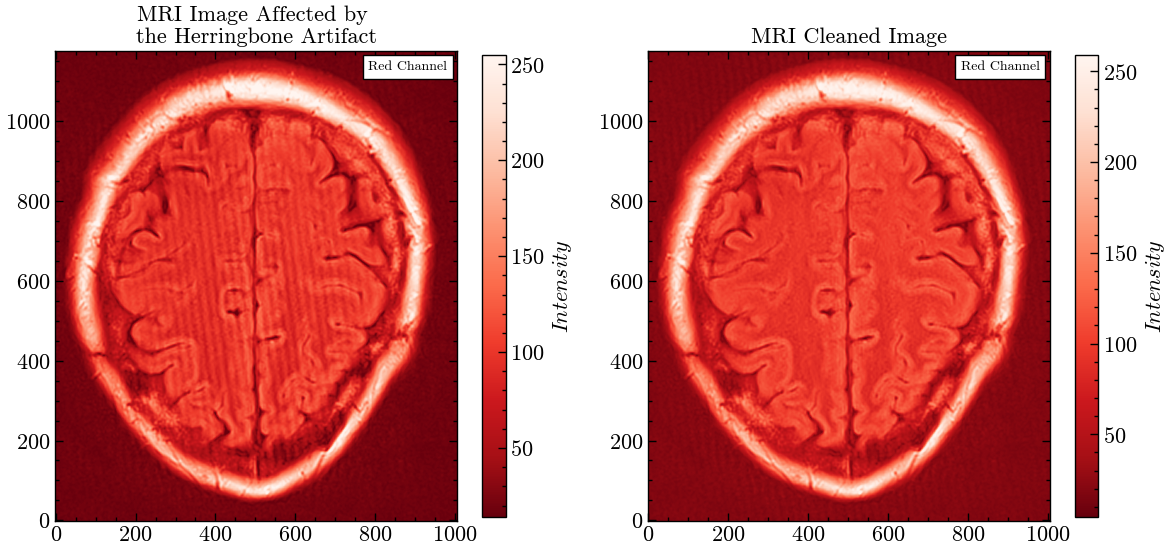

In [25]:
# Figure comparison between the original image and the cleaned image (Channel: Red)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,6))
ax1, ax2 = ax.flatten()

img1 = ax1.imshow(imgR, origin = 'lower', cmap = "Reds_r")
ax1.text(980, 1150, "Red Channel", ha = 'right', va = 'top', fontsize = 10,
            bbox = dict(facecolor = 'white', alpha = 1.0))

ax1.set_title("MRI Image Affected by \nthe Herringbone Artifact")
plt.colorbar(img1, shrink = 0.83, label = f"$Intensity$")

img2 = ax2.imshow(imgR_clean.real, origin = 'lower', cmap = "Reds_r")
ax2.text(980, 1150, "Red Channel", ha ='right', va ='top', fontsize = 10,
            bbox = dict(facecolor='white', alpha = 1.0))

ax2.set_title("MRI Cleaned Image")
plt.colorbar(img2, shrink = 0.83, label = f"$Intensity$")

plt.tight_layout()

plt.show()

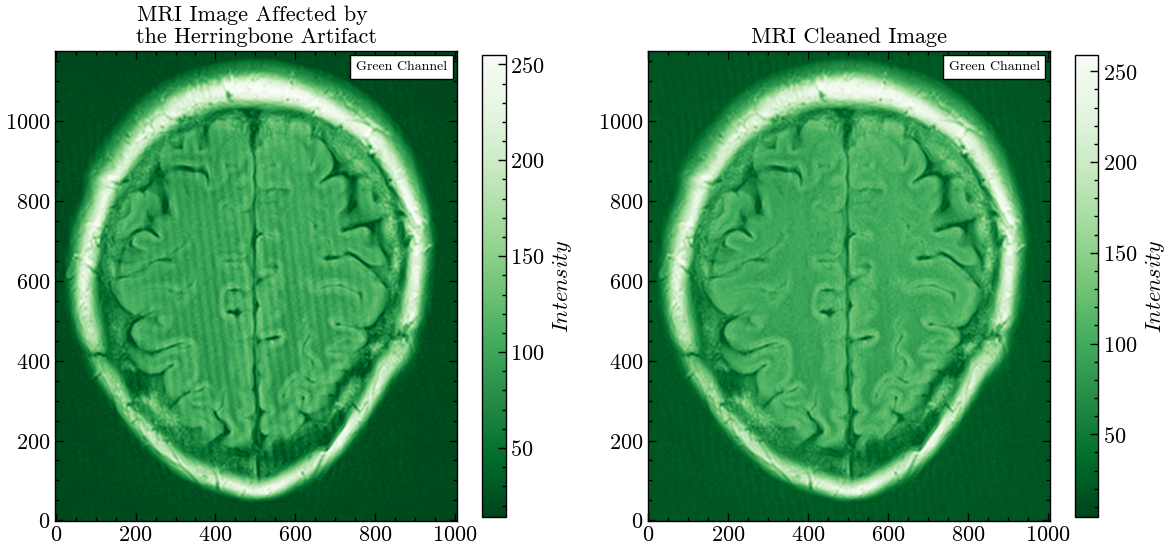

In [26]:
# Figure comparison between the original image and the cleaned image (Channel: Green)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,6))
ax1, ax2 = ax.flatten()

img1 = ax1.imshow(imgG, origin = 'lower', cmap = "Greens_r")
ax1.text(980, 1150, "Green Channel", ha = 'right', va = 'top', fontsize = 10,
            bbox = dict(facecolor = 'white', alpha = 1.0))

ax1.set_title("MRI Image Affected by \nthe Herringbone Artifact")
plt.colorbar(img1, shrink = 0.83, label = f"$Intensity$")

img2 = ax2.imshow(imgG_clean.real, origin = 'lower', cmap = "Greens_r")
ax2.text(980, 1150, "Green Channel", ha ='right', va ='top', fontsize = 10,
            bbox = dict(facecolor='white', alpha = 1.0))

ax2.set_title("MRI Cleaned Image")
plt.colorbar(img2, shrink = 0.83, label = f"$Intensity$")

plt.tight_layout()


In [27]:
# Reconstruct the image:

img_recons = np.zeros((img.shape[0], img.shape[1], 3), dtype = int)

# Assing the layers:

img_recons[:, :, 0] = imgR_clean.real
img_recons[:, :, 1] = imgG_clean.real
img_recons[:, :, 2] = imgB_clean.real

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


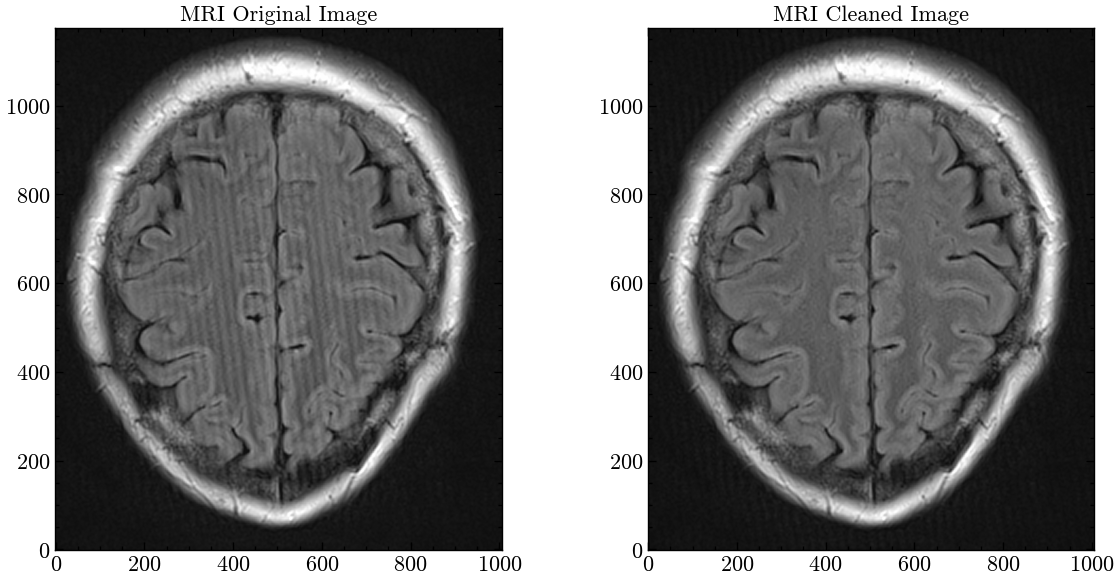

In [28]:
# Figure comparison between the original image and the cleaned image recostructed

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,6))
ax1, ax2 = ax.flatten()

img1 = ax1.imshow(img, origin = 'lower')

ax1.set_title("MRI Original Image")

img2 = ax2.imshow(img_recons, origin = 'lower')

ax2.set_title("MRI Cleaned Image")

plt.tight_layout()

plt.show()

The result is very good, there are no interference lines in the image anymore. At simple view, the information in the MRI image remains intact, with no loss of resolution. This demonstrates the power of the Fourier transform for different fields. It is also important to mention that the method is easy to apply and can be optimized and adapted to recognize and clean artifacts in any image. In this specific image, a combination of a high-pass filter and a circular mask was used to isolate artifacts in Fourier space. This demonstrates the flexibility of certain methods to be combined in order to achieve more accurate results. Creating the final mask in this manner can be more effective than using a trial-and-error approach.